In [2]:
import sys
sys.path.append("../../src")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from example_lorenz import generate_lorenz_data
import os
import pickle
from autoencoder import FullNetwork
import torch
from sindy_utils import sindy_simulate

data_path = os.getcwd() + '\\lorenz_model_1\\'
data_path_2 = os.getcwd() + '\\lorenz_model_2\\'
save_name = 'lorenz_2024_04_07_23_29_11_426420'
save_name_2 = 'lorenz_2024_04_08_10_25_28_288228'
params = pickle.load(open(data_path + save_name + '_params.pkl', 'rb'))
params_2 = pickle.load(open(data_path_2 + save_name_2 + '_params.pkl', 'rb'))
params['save_name'] = data_path + save_name
params_2['save_name'] = data_path_2 + save_name_2
dataframe = pd.read_pickle(data_path + 'experiment_results_202404080247.pkl')
dataframe_2 = pd.read_pickle(data_path_2 + 'experiment_results_202404081339.pkl')


Xi_plot = np.array(dataframe['coefficient_mask']*dataframe['sindy_coefficients'])[0]
sindy_coefficients = np.array(dataframe['sindy_coefficients'])[0]
coefficient_mask = np.array(dataframe['coefficient_mask'])[0]

Validation Loss lr=0.001:  8.627330316812731e-06
Validation Loss lr=0.002:  1.603992495802231e-05


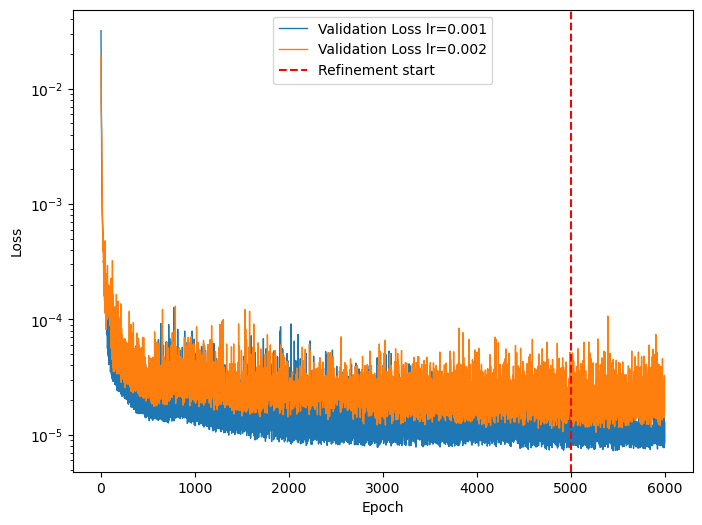

In [41]:
validation_total_losses = np.array(dataframe['validation_losses'])[0][:, 0]
validation_total_losses_2 = np.array(dataframe_2['validation_losses'])[0][:, 0]
print('Validation Loss lr=0.001: ', validation_total_losses[-1])
print('Validation Loss lr=0.002: ', validation_total_losses_2[-1])

fig, axes = plt.subplots(1, 1, figsize=(8, 6))
axes.plot(np.array(dataframe['validation_losses'])[0][:, 0], label='Validation Loss lr=0.001', linewidth=1)
axes.plot(np.array(dataframe_2['validation_losses'])[0][:, 0], label='Validation Loss lr=0.002', linewidth=1)
axes.set_xlabel('Epoch')
axes.set_ylabel('Loss')

axes.set_yscale('log')
# Draw vertical line at 5000 epochs
axes.axvline(5001, color='r', linestyle='--', label='Refinement start')
axes.legend()

plt.plot()
plt.savefig('lorenz_validation_loss.png')
